# Procesamiento de imágenes #06
### Pre-procesamiento de la imagen

Dra. C. Miriela Escobedo Nicot

* Las operaciones espaciales o de vecindad se definen en un entorno $E_N$ (vecindad) del punto a transformar $(m_0, n_0)$

![](images/24.png)

* Las operaciones fundamentales en estos tipo de operaciones son la correlación y la convolución.

### Convolución
* Es una forma general de un promedio móvil
* Es un operador matemático que transforma una entrada abitraria $x(t)$ en una respuesta de un sistema $y(t)$ a través del llamado núcleo de convolución.

### Convolución 2D

Este es el tipo de convolución que aplicaremos en nuestras imágenes.

* Son usadas para suavizar la imagen, afilar y detectar bordes.
* Se calcula el valor de un pixel en función de su valor y el valor de los píxeles que le rodean.
* La operación de la convolución puede representarse como la siguiente operación:

![](images/25.png)

![](images/26.png)

que si $h$ es simétrico

![](images/27.png)

* Donde $h$ se denomina ventana deslizante

![](images/28.png)

Si el núcleo de convolución no es simétrico se aplica una rotación de 180 grados y se puede utilizar de la misma forma que en el caso simétrico.

### Convolución de imágenes en Python

Comenzaremos por cargar una imagen simple para mostar varios ejemplos.

In [1]:
from pylab import *
from skimage.data import camera
rcParams['image.cmap'] = 'gray'

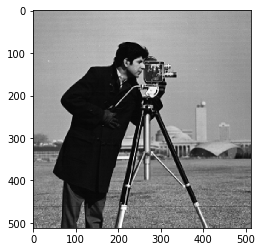

In [2]:
image = camera() / 255 # escalar valores entre 0 y 1

imshow(image)

Ahora vamos a definir el núcleo de convolución

In [3]:
kernel = full((3,3), 1/9) # Filtro promedio

print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Ahora obtendremos la imagen pixelada haciendo un recorrido sobre ella con un salto de 10

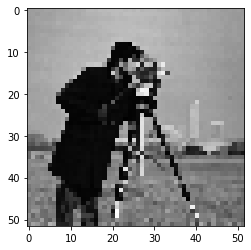

In [4]:
pixelated = image[::10, ::10]

imshow(pixelated)

Utilizaremos la siguiente función utilitaria para mostrar varias imágenes

In [5]:
from skimage import img_as_float

def imshow_all(*images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax)
        ax.set_title(label)

Probando la función

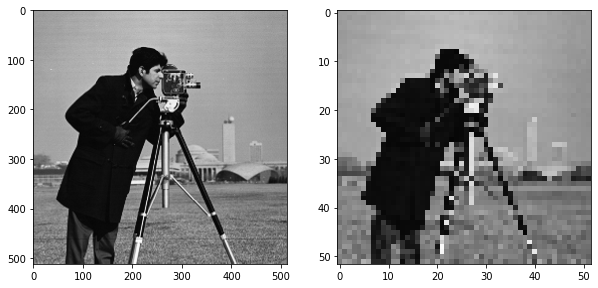

In [6]:
imshow_all(image, pixelated)

Para aplicar la convolución utilizaremos la función `convolve` que se encuentra en el módulo `ndimage` de la biblioteca `scipy`

In [7]:
from scipy.ndimage import convolve as conv2 # Convolución 2D

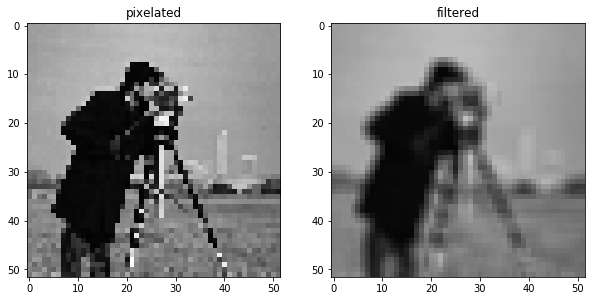

In [8]:
filtered = conv2(pixelated, kernel)

imshow_all(pixelated, filtered, titles=['pixelated', 'filtered'])

Podemos observar como se produce un suavizado en la imagen, debido a que los pixeles oscuros reducen su intensidad debido a los pixeles vecinos y viceversa.

La operación de correlación se realiza de manera similar pero utilizando la función `correlate`

In [9]:
from scipy.ndimage import correlate as corr2

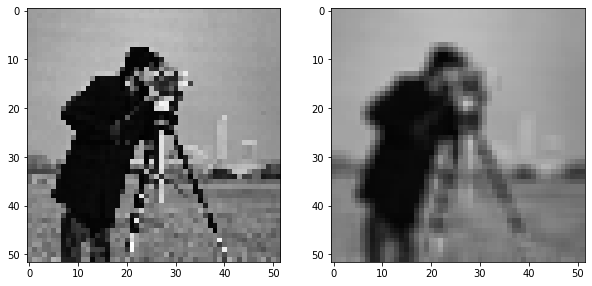

In [10]:
filtered2 = corr2(pixelated, kernel)

imshow_all(pixelated, filtered2)

### Filtros
* Los filtros son un tipo de operación que altera el valor de un píxel en función de los valores de los píxeles que le rodean.
* También se le denomina procesamiento basado en la vecindad u operación de vecindad.
* En esencia filtrar una imagen consiste en aplicar una transformación de forma que se acentúen o disminuyan ciertos aspectos.

![](images/29.png)

### Filtrado en el dominio espacial
* Operan directamente sobre los pixeles de la imagen
* Se utiliza generalmente una "máscara" que opera sobre una vecindad de pixeles ($E_N$), centrándose sobre el pixel de interés.
* Se realiza una convolución (barrido) de la máscara con la imagen (correlación).
* Cada pixel de la nueva imagen se obtiene mediante la sumatoria de la multiplicación de la máscara por la vecindad del pixel:

![](images/30.png)

* Generalmente se divide sobre cierto valor constante para normalizar.
* El tipo de filtro está determinado por el contenido de la "máscara".

![](images/31.png)

##### Tratamiento de los límites de la imagen

* A la hora de tratar los límites de la imagen, puede aplicarse la máscara extendiendo la imagen como un marco de cerso de la anchura adecuada. O bien aplicar simetrías.

* Esto puede tener efectos no deseados (p.e., de difuminado en los límites de la imagen, o introducir píxeles de bordes inexistentes) pero, en general, poco significativos si la máscara es pequeña en relación con el tamaño de la imagen.

![](images/32.png)

### Filtros lineales PASO-BAJO
* Eliminan ruido o detalles pequeños que no sean de interés.
    Se suelen utilizar para: desenfocar, suavizar, eliminar ruido.
    
* Todos los coeficientes positivos de suma 1.

* Filtros <b>paso-bajo</b> (PB)
    - <b>Promedio</b>: promedio de píxeles vecinos (máscara con unos)
    - <b>Mediana</b>: Sustituye por mediana de la vecindad (generalmente mejor al promedio, es no lineal)
    - <b>Gaussiano</b>: Aproximación de una distribución gaussiana.

* Se utilizan para reducir ruido aunque también producen un difuminado, tanto mayor cuanto mayor sea el tamaño de la máscara.

#### Filtro Promedio

El filtro promedio se puede obtener aplicando una correlación a la imagen utilizando lo que denominamos `mean_kernel` que no es más que una matriz de dimensiones (3, 3) con todos sus elementos iguales a $\frac{1}{9}$

In [11]:
from scipy.ndimage import correlate

In [12]:
mean_kernel = ones((3, 3)) / 9

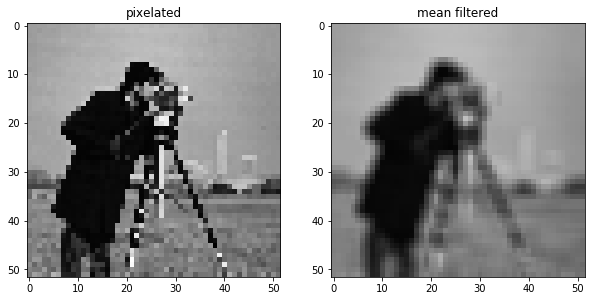

In [13]:
filtered = correlate(pixelated, mean_kernel)
imshow_all(pixelated, filtered, titles=['pixelated', 'mean filtered'])


#### Filtro Gaussiano

In [14]:
from skimage.filters import gaussian

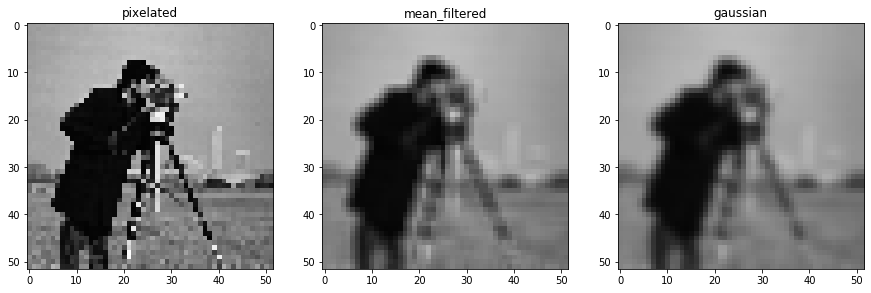

In [15]:
filtered_gaussian = gaussian(pixelated)
imshow_all(pixelated, filtered, filtered_gaussian, titles=['pixelated', 'mean_filtered', 'gaussian'])

Podemos apreciar que no existe mucha diferencia sin embargo las cosas cambian cuando aplicamos las trasnformaciones a imágenes de mayor resolución.

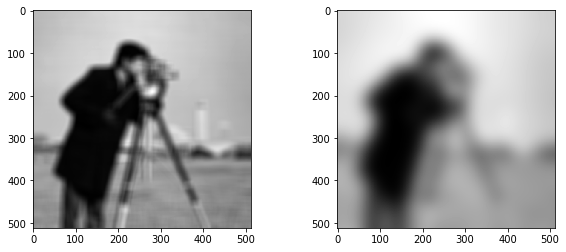

In [16]:
kernel20 = ones((20,20))

filtered20 = correlate(image, kernel20)
filtered_gaussian20 = gaussian(image, 20) # el segundo parámetro es sigma

_, (ax0, ax1) = subplots(1,2, figsize=(10, 4))

ax0.imshow(filtered20)
ax1.imshow(filtered_gaussian20)

* El filtro gaussiano se usa para suavizar la imagen.
* El suavizado es dependiente de la desviación estándar de la mascara.
* A mayor valor de sigma el suavizado es mayor.
* La máscara es no lineal pero el filtro es lineal.

![](images/33.png)

### Filtros lineales PASO-ALTO

* Intensifica los detalles y cambios, mientras que atenua las partes uniformes. Se utilizan para: resaltar bordes, enfocar, detección de piezas, objetivos, ...

* Suma de los pesos es cero (se "eliminan" regiones de intensidad uniforme)
    * En general, se reduce mucho el contraste.
    * Aparecen valores positivos y negativos: hay que escalar o recortar.

* Los filtros de acentuamiento tienden a eliminar las zonas de baja frecuencia.
* Los filtros de énfasis de alta frecuencia también acentúan los detalles pero preservan las zonas uniformes.
* Una forma de implementarlos es multiplicando la imagen original por una constante, $A>1$, combinado con un filtro pasa alto.

##### Una forma de implementar un filtro PA es "restando" a la imagen original una filtrada con un PB:

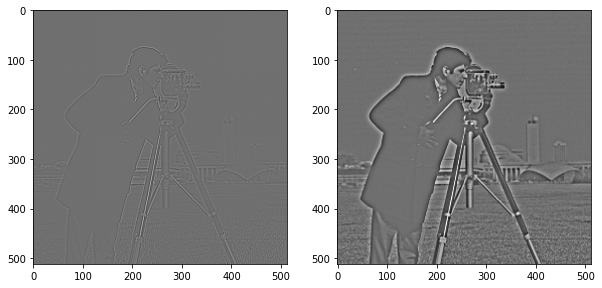

In [17]:
A = image - gaussian(image)
B = image - gaussian(image, 5)
C = image - gaussian(image, 15)
D = image - gaussian(image, 25)

imshow_all(A, B)

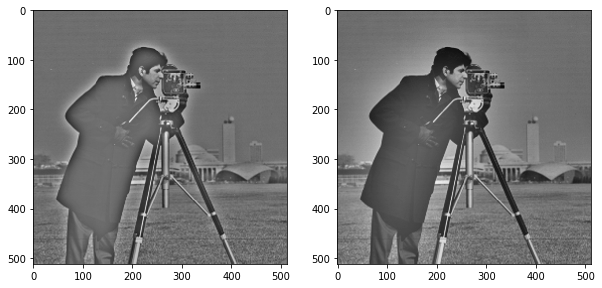

In [18]:
imshow_all(C, D)

![](images/34.png)

In [19]:
from skimage.filters import roberts, prewitt, sobel

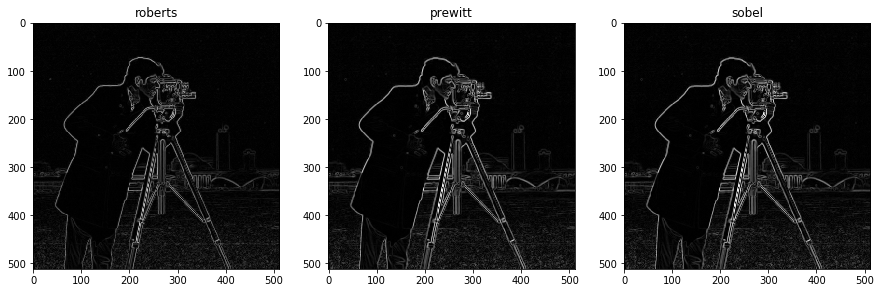

In [20]:
A = roberts(image)
B = prewitt(image)
C = sobel(image)

imshow_all(A, B, C, titles=["roberts", "prewitt", "sobel"])

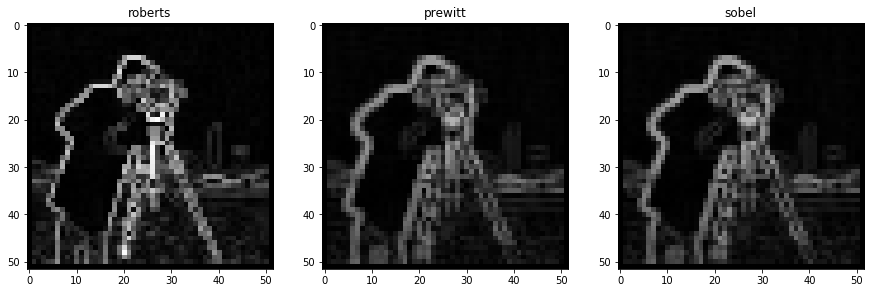

In [21]:
AA = roberts(pixelated)
BB = prewitt(pixelated)
CC = sobel(pixelated)

imshow_all(AA, BB, CC, titles=["roberts", "prewitt", "sobel"])

##### Combinando con procedimientos anteriores

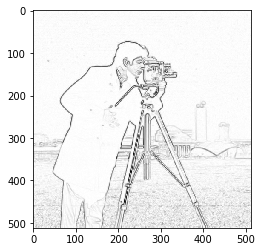

In [22]:
imshow(A*-1) # negativo

##### Binarizando

In [23]:
from skimage.filters import threshold_otsu as otsu

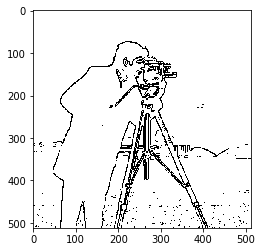

In [24]:
BA = A < otsu(A)

imshow(BA)

#### Filtro Laplaciano

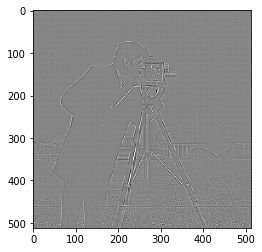

In [25]:
from skimage.filters import laplace

LA = laplace(image)

imshow(LA)

#### Filtros PASO-BANDA

* Filtrado paso-banda: se utiliza para realzar bordes, etc.
* Los coeficientes deben de sumar cero. Ejemplo:

In [26]:
pb_kernel = array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])

print(pb_kernel)

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


* Se reduce mucho el contraste.
* Aparecen valores negativos, por tanto se tiene que recortar o escalar.
* Se puede implementar a partir de dos FPB de diferente frecuencia y corte.

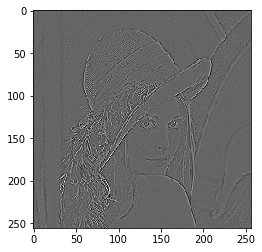

In [27]:
lena = imread('dataset/lena_gray_256.tif').astype('float')
PBImage = correlate(lena, pb_kernel)

imshow(PBImage)